In [1]:
import pandas
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

In [2]:
def plot_history(history, filename=""):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1, len(loss) + 1)
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,10))
    fig.suptitle('Loss and accuracy')

    ax1.plot(epochs, loss, color="green", label='Training loss')
    ax1.plot(epochs, val_loss, color = "blue", label='Validation loss')
    ax1.legend()

    ax2.plot(epochs, acc, color="green", label='Training acc')
    ax2.plot(epochs, val_acc, color = "blue", label='Validation acc')
    ax2.legend()

    plt.show()

    if (filename != ""):
        plt.savefig(filename)

def print_history(history):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']

    print("T loss: {}; V loss: {}; T accuracy: {}; V accuracy: {}"
          .format(loss[-1], val_loss[-1], acc[-1], val_acc[-1]))
    plot_history(history)
    print('----------------------------------------------------------------------------')

In [12]:
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:, 0:60].astype(float)
X40 = dataset[:, 0:40].astype(float)
Y = dataset[:, 60]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

T loss: 0.22667384147644043; V loss: 0.3300186097621918; T accuracy: 0.9304812550544739; V accuracy: 0.9047619104385376


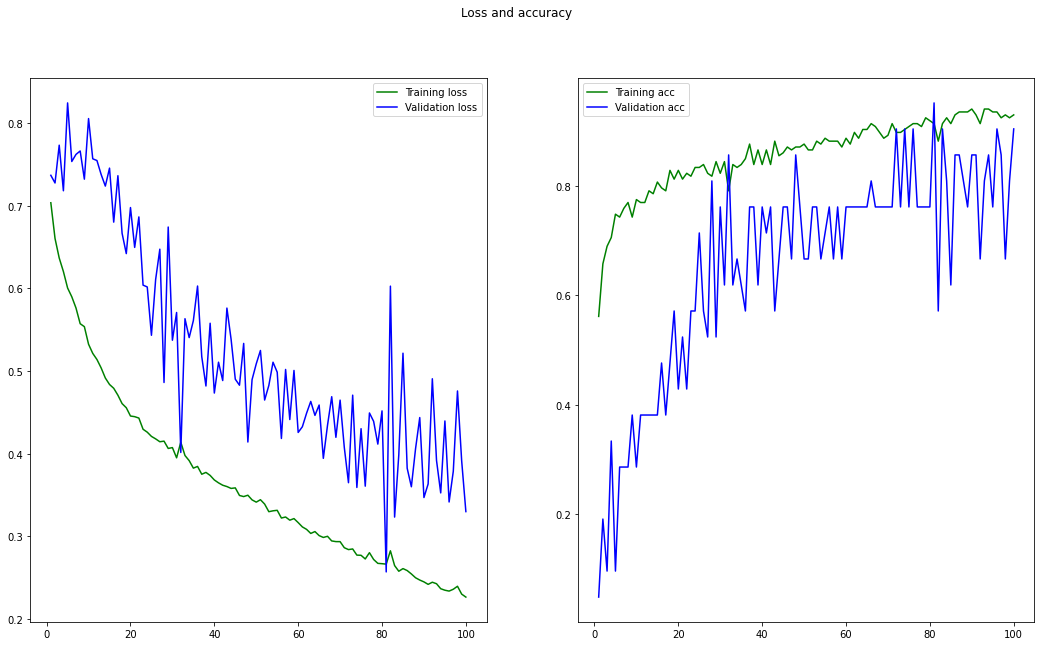

----------------------------------------------------------------------------


In [13]:
# Model 1
model = Sequential()
model.add(Dense(60, input_dim=60, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=False)
print_history(history.history)

T loss: 0.2990739047527313; V loss: 0.31813231110572815; T accuracy: 0.8877005577087402; V accuracy: 0.9047619104385376


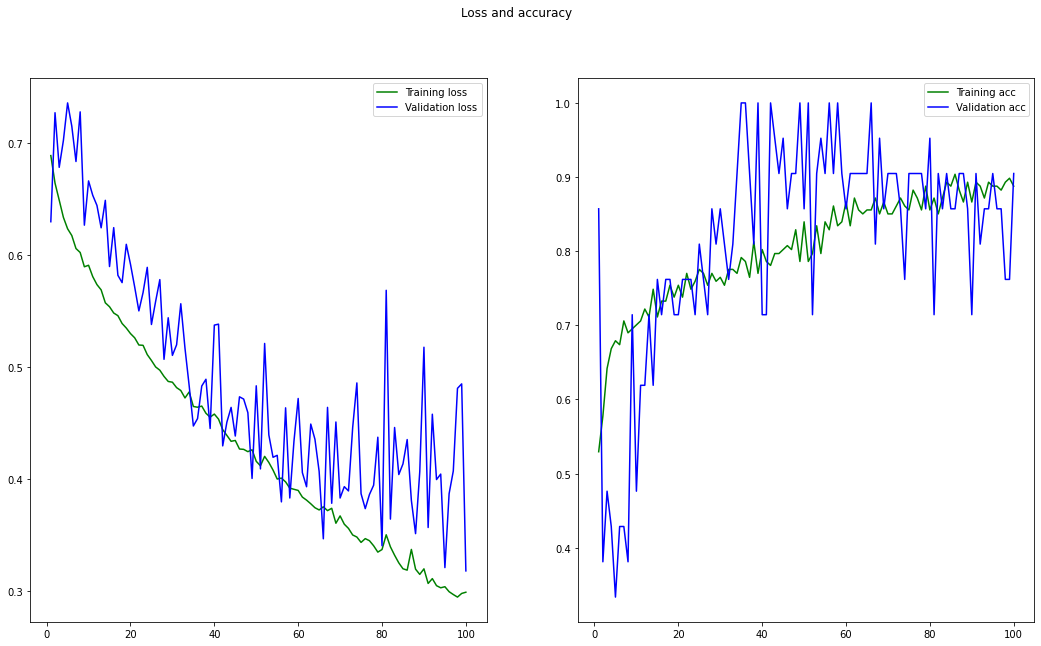

----------------------------------------------------------------------------


In [14]:
# Model 2
model = Sequential()
model.add(Dense(60, input_dim=40, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X40, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=False)
print_history(history.history)

T loss: 0.011889040470123291; V loss: 0.19316868484020233; T accuracy: 1.0; V accuracy: 0.9523809552192688


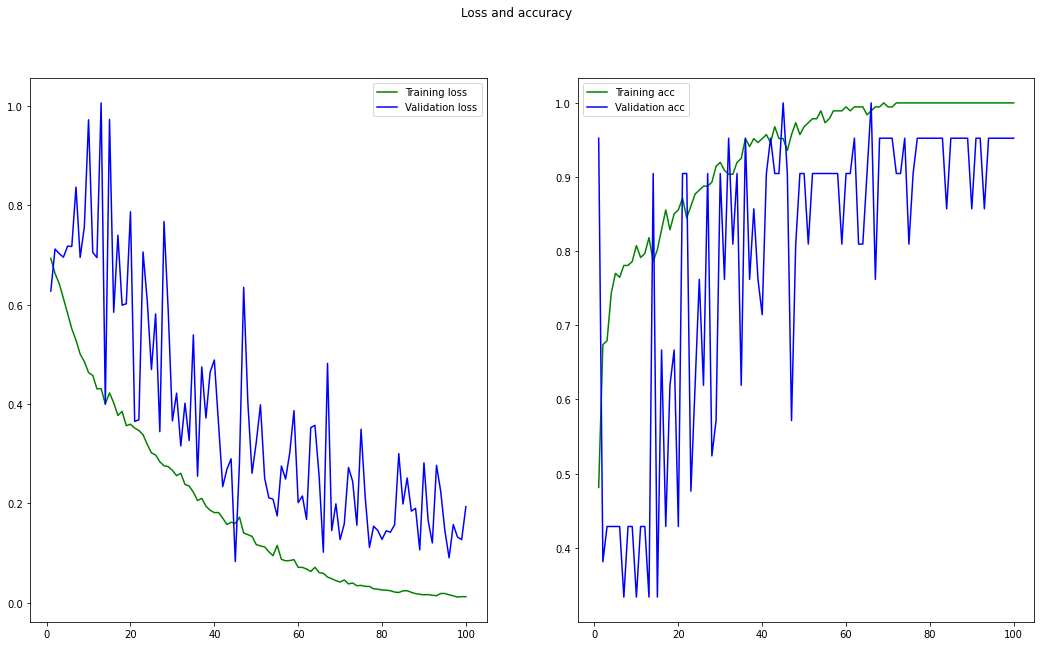

----------------------------------------------------------------------------


In [29]:
# Model 3
model = Sequential()
model.add(Dense(60, input_dim=60, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=False)
print_history(history.history)

T loss: 0.03550780192017555; V loss: 0.14914101362228394; T accuracy: 1.0; V accuracy: 1.0


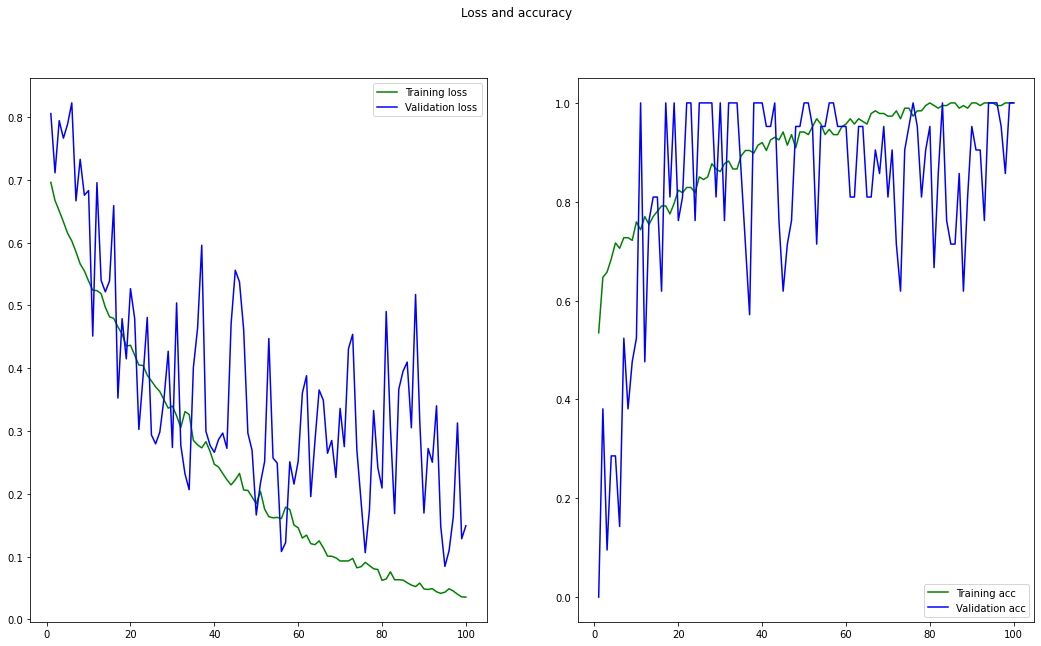

----------------------------------------------------------------------------


In [28]:
# Model 4
model = Sequential()
model.add(Dense(60, input_dim=40, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X40, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=False)
print_history(history.history)